In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import math

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
test = pd.read_csv('data/mnist_test.csv')
train = pd.read_csv('data/mnist_train.csv')

In [3]:
train_x = train['label']
test_x = test['label']

In [4]:
from sklearn.svm import SVC
del train["label"]
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train, train_x) 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [5]:
res = test["label"]
del test["label"]
a = clf.predict(test)
len(a)

10000

In [6]:
accuracy_score(a,res)

0.9468

In [7]:
train_len = len(train)

In [8]:
data = pd.concat([train, test], axis=0)
data_labels = pd.concat([train_x, test_x], axis=0)
data_labels = data_labels.values.tolist()

In [9]:
map(int,data_labels)

In [10]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])



In [11]:
principalDf['label'] = data_labels

In [12]:
principalDf

principal component 1  principal component 2  label
0                 122.252845            -316.226623      5
1                1010.490151            -289.926525      0
2                 -58.993909             393.677424      4
3                -796.971399            -607.353478      1
4                -391.316247             729.781628      9
5                 185.962708             223.896252      2
6                -730.479109            -162.076107      1
7                 503.492644            -308.799144      3
8                -874.547051             -84.363502      1
9                -304.012017             463.522757      4
10               -150.862711            -652.363963      3
11               -612.338599            -243.521105      5
12                269.546060            -836.373041      3
13                252.232975             153.138083      6
14               -867.599136            -234.431062      1
15               -144.156825             866.510321      7
16                 93.182133               3.174631      2
17               -384.824109            -255.020996      8
18               -208.512878            -199.758159      6
19               -787.747356              68.838972      9
20                333.754593             505.341798      4
21               1033.558969            -351.160569      0
22               -649.984193             197.188350      9
23               -806.256423            -527.858872      1
24               -264.135958            -291.785682      1
25                765.527762           -1052.101979      2
26               -613.044801             425.101793      4
27                777.376714            -618.229712      3
28                347.439670             205.103653      2
29               -648.748769             118.253771      7
...                      ...                    ...    ...
69970             -47.901505            -445.421714      5
69971             169.692055              75.036499      2
69972            -195.934127             863.377157      4
69973              13.221890             870.345692      9
69974            -338.852289             548.911778      4
69975            -169.665761              -3.395067      3
69976            -396.485853             -21.389719      6
69977            -450.064829             259.051957      4
69978            -737.105430            -469.588662      1
69979              52.356169             970.531042      7
69980            1023.937757            -208.574883      2
69981            -278.805257            -240.885327      6
69982             -65.285082            -307.782435      5
69983            1617.274665            -327.915303      0
69984            -995.541740            -293.340265      1
69985              43.379209             -70.332154      2
69986              63.666584            -204.464050      3
69987             -78.200616             959.647604      4
69988             -59.524482              80.207664      5
69989             476.104893            -329.061168      6
69990            -531.182595             411.279491      7
69991             531.181403            -422.972737      8
69992             341.057268             959.254919      9
69993            1487.658769            -383.724787      0
69994            -954.914831            -737.540260      1
69995             305.693135            -549.639953      2
69996             569.187479            -699.044598      3
69997            -271.506681             590.071360      4
69998            -310.216353            -116.799065      5
69999            1058.858036             -83.359098      6

[70000 rows x 3 columns]

In [13]:
train, test = principalDf.iloc[:train_len, :], principalDf.iloc[train_len:, :]

In [14]:
test['pred'] = a

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


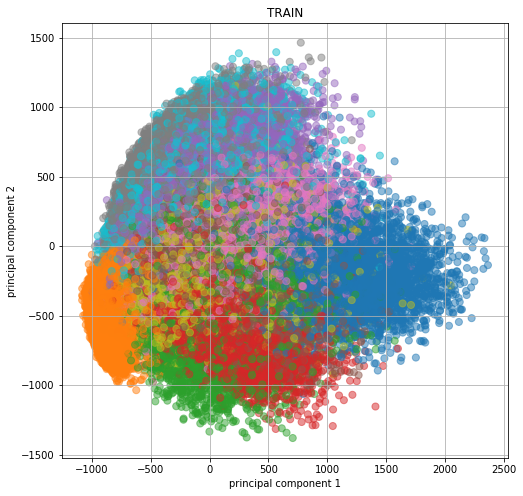

In [15]:
c = []
for i in train.values:
    if int(i[2]) == 0:
        c.append('C0')
    elif int(i[2]) == 1:
        c.append('C1')
    elif int(i[2]) == 2:
        c.append('C2')
    elif int(i[2]) == 3:
        c.append('C3')
    elif int(i[2]) == 4:
        c.append('C4')
    elif int(i[2]) == 5:
        c.append('C5')
    elif int(i[2]) == 6:
        c.append('C6')
    elif int(i[2]) == 7:
        c.append('C7')
    elif int(i[2]) == 8:
        c.append('C8')
    elif int(i[2]) == 9:
        c.append('C9')
    



plt1 = train.plot.scatter(x = "principal component 1", y="principal component 2", 
                        c = c, s = 50, alpha = 0.5,figsize = (8,8),grid = True,title="TRAIN")



In [16]:
#Grid size for test for perfect size

max_1 = test.loc[test['principal component 1'].idxmax()]['principal component 1']

max_2 = test.loc[test['principal component 2'].idxmax()]['principal component 2']

min_1 = test.loc[test['principal component 1'].idxmin()]['principal component 1']

min_2 = test.loc[test['principal component 2'].idxmin()]['principal component 2']

x_axis = round((max_1 - min_1)/10)

y_axis = round((max_2-min_2)/10)

x_axis = x_axis.as_integer_ratio()[0]

y_axis = y_axis.as_integer_ratio()[0]

x_l = []
y_l = []
for i in range(0,11):
    x_l.append(round(min_1 + x_axis*i))

for i in range(0,11):
    y_l.append(round(min_2 + y_axis*i))


In [17]:
x_l

[-1079.0,
 -733.0,
 -387.0,
 -41.0,
 305.0,
 651.0,
 997.0,
 1343.0,
 1689.0,
 2035.0,
 2381.0]

In [18]:
y_l

[-1429.0,
 -1157.0,
 -885.0,
 -613.0,
 -341.0,
 -69.0,
 203.0,
 475.0,
 747.0,
 1019.0,
 1291.0]

In [71]:
def genXY(h,data):
    """
    generate x and y grid values of height h
    """
    minx = min(data['principal component 1']) - h
    maxx = max(data['principal component 1']) + h
    numDivX = round((maxx - minx)/h)
    print(numDivX)
    x_l = []
    x_l.append(minx)
    for i in range(1,numDivX+1):
        x_l.append((i*h) +minx)
    
        
        
    miny = min(data['principal component 2']) - h
    maxy = max(data['principal component 2']) + h
    numDivY = round((maxy - miny)/h)
    print(numDivY)
    y_l = []
    y_l.append(miny)
    for i in range(1,numDivY+1):
        y_l.append((i*h) + miny)
    
    
    return x_l,y_l
        

In [72]:
x_l_1, y_l_1 = genXY(100,test)

37
29


In [73]:
y_l_1

[-1528.8635289989875,
 -1428.8635289989875,
 -1328.8635289989875,
 -1228.8635289989875,
 -1128.8635289989875,
 -1028.8635289989875,
 -928.8635289989875,
 -828.8635289989875,
 -728.8635289989875,
 -628.8635289989875,
 -528.8635289989875,
 -428.8635289989875,
 -328.8635289989875,
 -228.86352899898748,
 -128.86352899898748,
 -28.863528998987476,
 71.13647100101252,
 171.13647100101252,
 271.1364710010125,
 371.1364710010125,
 471.1364710010125,
 571.1364710010125,
 671.1364710010125,
 771.1364710010125,
 871.1364710010125,
 971.1364710010125,
 1071.1364710010125,
 1171.1364710010125,
 1271.1364710010125,
 1371.1364710010125]

In [74]:
c = []
for i in test.values:
    if int(i[2]) == 0:
        c.append('C0')
    elif int(i[2]) == 1:
        c.append('C1')
    elif int(i[2]) == 2:
        c.append('C2')
    elif int(i[2]) == 3:
        c.append('C3')
    elif int(i[2]) == 4:
        c.append('C4')
    elif int(i[2]) == 5:
        c.append('C5')
    elif int(i[2]) == 6:
        c.append('C6')
    elif int(i[2]) == 7:
        c.append('C7')
    elif int(i[2]) == 8:
        c.append('C8')
    elif int(i[2]) == 9:
        c.append('C9')
    



/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


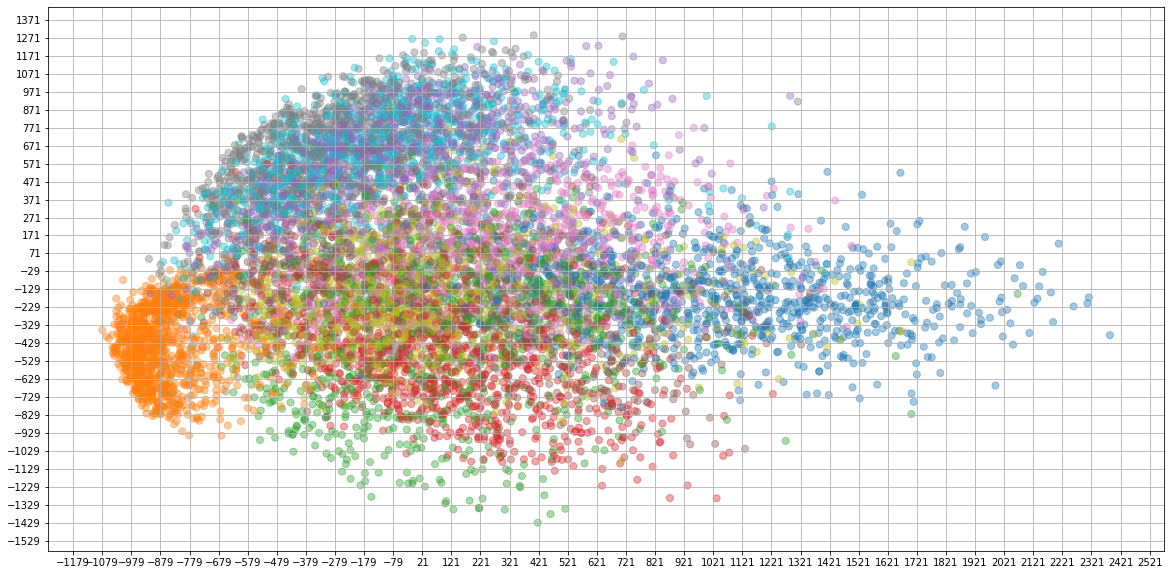

In [75]:


fig = plt.figure(figsize = (20,10))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.scatter(test['principal component 1']
               , test['principal component 2']
               , c = c
               , s = 50
              , alpha = 0.4)

ax.grid()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


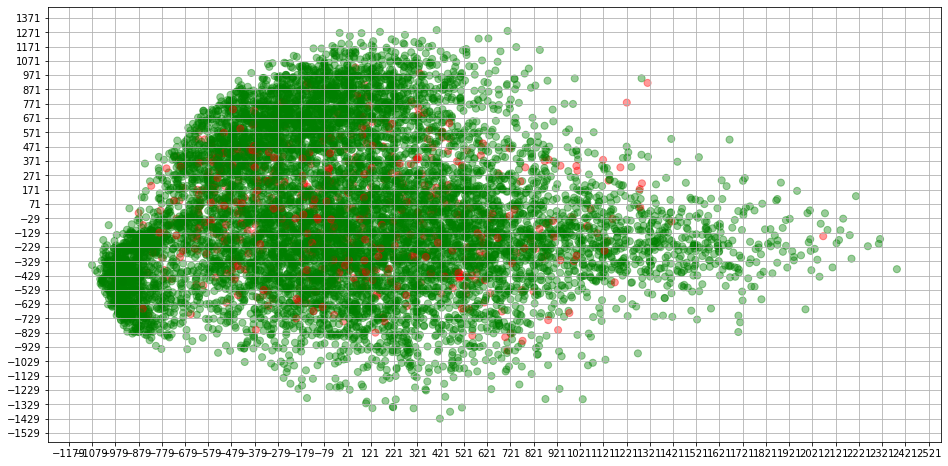

In [76]:
test["color"] = test["label"] == test["pred"]
c = []
for i in test["color"]:
    if i:
        c.append('g')
    else:
        c.append('r')

fig = plt.figure(figsize = (16,8))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.scatter(test['principal component 1']
               , test['principal component 2']
               , c = c
               , s = 50
              , alpha = 0.4)

ax.grid()

In [77]:
accuracy_score(test.pred,test.label)

0.9468

In [78]:
def inWindows(x1,x2,y1,y2,x,y):
    if (x >= x1 and x < x2) and (y>=y1 and y<y2):
        return True
    return False

In [79]:
def genDensityMetric(data,x_l,y_l):
    """
     get count of data points in a grid line and accuracy percentage
    """
    densityMap = []
    count = len(data)
    for x in range(len(x_l)-1):
        for y in range(len(y_l)-1):
            results = []
            preds = []
            density = 0
            for i in data.values:
                if(inWindows(x_l[x],x_l[x+1],y_l[y],y_l[y+1],i[0],i[1])):
                    results.append(i[3])
                    preds.append(i[2])
                    density = density + 1
            if density != 0:
                f1 = f1_score(results,preds,average='micro')
                acc = accuracy_score(results,preds)
                rec = recall_score(results,preds, average='micro')
                prec = precision_score(results,preds, average='micro')
                densityMap.append([x_l[x],x_l[x+1],y_l[y],y_l[y+1],density,density/count,acc,f1,rec,prec])
    dm = pd.DataFrame(data = densityMap, columns=['x1','x2','y1','y2','num points','density','accuracy score','f1 score','recall score','precision score'])
    return dm
            

In [80]:
densityMap = genDensityMetric(test,x_l_1,y_l_1)

In [81]:
densityMap.sort_values(by=['density'],ascending=False)

x1           x2           y1           y2  num points  density  \
12   -979.479606  -879.479606  -428.863529  -328.863529          82   0.0082   
25   -879.479606  -779.479606  -228.863529  -128.863529          81   0.0081   
11   -979.479606  -879.479606  -528.863529  -428.863529          81   0.0081   
13   -979.479606  -879.479606  -328.863529  -228.863529          80   0.0080   
10   -979.479606  -879.479606  -628.863529  -528.863529          75   0.0075   
171  -179.479606   -79.479606   571.136471   671.136471          64   0.0064   
186   -79.479606    20.520394  -328.863529  -228.863529          64   0.0064   
9    -979.479606  -879.479606  -728.863529  -628.863529          63   0.0063   
123  -379.479606  -279.479606   571.136471   671.136471          61   0.0061   
188   -79.479606    20.520394  -128.863529   -28.863529          59   0.0059   
122  -379.479606  -279.479606   471.136471   571.136471          58   0.0058   
147  -279.479606  -179.479606   671.136471   771.136471          58   0.0058   
100  -479.479606  -379.479606   471.136471   571.136471          57   0.0057   
146  -279.479606  -179.479606   571.136471   671.136471          56   0.0056   
172  -179.479606   -79.479606   671.136471   771.136471          55   0.0055   
124  -379.479606  -279.479606   671.136471   771.136471          55   0.0055   
187   -79.479606    20.520394  -228.863529  -128.863529          55   0.0055   
99   -479.479606  -379.479606   371.136471   471.136471          55   0.0055   
212    20.520394   120.520394  -328.863529  -228.863529          53   0.0053   
240   120.520394   220.520394  -228.863529  -128.863529          51   0.0051   
197   -79.479606    20.520394   771.136471   871.136471          50   0.0050   
163  -179.479606   -79.479606  -228.863529  -128.863529          50   0.0050   
121  -379.479606  -279.479606   371.136471   471.136471          49   0.0049   
189   -79.479606    20.520394   -28.863529    71.136471          48   0.0048   
78   -579.479606  -479.479606   271.136471   371.136471          48   0.0048   
101  -479.479606  -379.479606   571.136471   671.136471          48   0.0048   
80   -579.479606  -479.479606   471.136471   571.136471          47   0.0047   
196   -79.479606    20.520394   671.136471   771.136471          47   0.0047   
14   -979.479606  -879.479606  -228.863529  -128.863529          47   0.0047   
148  -279.479606  -179.479606   771.136471   871.136471          47   0.0047   
..           ...          ...          ...          ...         ...      ...   
385   620.520394   720.520394  1171.136471  1271.136471           1   0.0001   
386   620.520394   720.520394  1271.136471  1371.136471           1   0.0001   
387   720.520394   820.520394 -1228.863529 -1128.863529           1   0.0001   
453  1020.520394  1120.520394 -1328.863529 -1228.863529           1   0.0001   
457  1020.520394  1120.520394  -828.863529  -728.863529           1   0.0001   
524  1520.520394  1620.520394  -628.863529  -528.863529           1   0.0001   
498  1220.520394  1320.520394   771.136471   871.136471           1   0.0001   
523  1520.520394  1620.520394  -728.863529  -628.863529           1   0.0001   
522  1520.520394  1620.520394  -828.863529  -728.863529           1   0.0001   
521  1420.520394  1520.520394   271.136471   371.136471           1   0.0001   
520  1420.520394  1520.520394   171.136471   271.136471           1   0.0001   
47   -679.479606  -579.479606 -1028.863529  -928.863529           1   0.0001   
512  1420.520394  1520.520394  -628.863529  -528.863529           1   0.0001   
511  1420.520394  1520.520394  -728.863529  -628.863529           1   0.0001   
510  1320.520394  1420.520394   471.136471   571.136471           1   0.0001   
84   -479.479606  -379.479606 -1128.863529 -1028.863529           1   0.0001   
105  -479.479606  -379.479606   971.136471  1071.136471           1   0.0001   
497  1220.520394  1320.520394   471.136471   571.136471           1   0.0001   
255   120.5203

In [82]:
densityMap.sum(axis = 0, skipna = True)

x1                 198381.307927
x2                 256281.307927
y1                 -84011.983290
y2                 -26111.983290
num points          10000.000000
density                 1.000000
accuracy score        551.733638
f1 score              551.733638
recall score          551.733638
precision score       551.733638
dtype: float64

In [83]:
len(test)

10000

In [30]:
densityMap.sort_values(by=['accuracy score'],ascending=True)

x            y  num points  density  accuracy score  f1 score  \
487  1320.520394   871.136471           1   0.0001        0.000000  0.000000   
404   920.520394  -728.863529           1   0.0001        0.000000  0.000000   
425  1020.520394  -728.863529           1   0.0001        0.000000  0.000000   
559  2120.520394  -128.863529           1   0.0001        0.000000  0.000000   
483  1320.520394   271.136471           2   0.0002        0.000000  0.000000   
436  1020.520394   371.136471           4   0.0004        0.250000  0.250000   
488  1320.520394   971.136471           2   0.0002        0.500000  0.500000   
379   820.520394  -828.863529           6   0.0006        0.666667  0.666667   
458  1120.520394   471.136471           3   0.0003        0.666667  0.666667   
309   520.520394  -428.863529          22   0.0022        0.727273  0.727273   
353   720.520394  -828.863529           4   0.0004        0.750000  0.750000   
426  1020.520394  -628.863529           4   0.0004        0.750000  0.750000   
22   -779.479606   271.136471           4   0.0004        0.750000  0.750000   
104  -279.479606  -528.863529          21   0.0021        0.761905  0.761905   
111  -279.479606   171.136471          22   0.0022        0.772727  0.772727   
291   420.520394   471.136471          18   0.0018        0.777778  0.777778   
471  1220.520394   371.136471           5   0.0005        0.800000  0.800000   
463  1220.520394  -428.863529           5   0.0005        0.800000  0.800000   
160   -79.479606   271.136471          25   0.0025        0.800000  0.800000   
20   -779.479606    71.136471          10   0.0010        0.800000  0.800000   
382   820.520394  -528.863529          10   0.0010        0.800000  0.800000   
66   -479.479606  -128.863529          31   0.0031        0.806452  0.806452   
51   -579.479606   171.136471          21   0.0021        0.809524  0.809524   
430  1020.520394  -228.863529          16   0.0016        0.812500  0.812500   
31   -679.479606  -228.863529          16   0.0016        0.812500  0.812500   
332   620.520394  -428.863529          22   0.0022        0.818182  0.818182   
84   -379.479606  -328.863529          28   0.0028        0.821429  0.821429   
47   -579.479606  -228.863529          17   0.0017        0.823529  0.823529   
294   420.520394   771.136471          17   0.0017        0.823529  0.823529   
411   920.520394   -28.863529          17   0.0017        0.823529  0.823529   
..           ...          ...         ...      ...             ...       ...   
224   220.520394  -928.863529          10   0.0010        1.000000  1.000000   
223   220.520394 -1028.863529           3   0.0003        1.000000  1.000000   
222   220.520394 -1128.863529           3   0.0003        1.000000  1.000000   
221   220.520394 -1228.863529           1   0.0001        1.000000  1.000000   
257   320.520394  -328.863529          28   0.0028        1.000000  1.000000   
266   320.520394   571.136471          15   0.0015        1.000000  1.000000   
267   320.520394   671.136471          17   0.0017        1.000000  1.000000   
268   320.520394   771.136471          19   0.0019        1.000000  1.000000   
302   520.520394 -1128.863529           2   0.0002        1.000000  1.000000   
301   520.520394 -1228.863529           1   0.0001        1.000000  1.000000   
300   420.520394  1371.136471           1   0.0001        1.000000  1.000000   
299   420.520394  1271.136471           3   0.0003        1.000000  1.000000   
298   420.520394  1171.136471           4   0.0004        1.000000  1.000000   
296   420.520394   971.136471          15   0.0015        1.000000  1.000000   
295   420.520394   871.136471          17   0.0017        1.000000  1.000000   
566  2320.520394  -128.863529           3   0.0003        1.000000  1.000000   
281   420.520394  -528.863529          16   0.0016        1.000000  1.000000   
383   820.520394  -428.863529          16   0.0016        1.000000  1.000000   
280   420.52039

## Alpha as a function of accuracy score (scale of 0.01 to 0.4)

In [110]:
def genAlpha(x,y,test,grid,ind):
    a = []
    maxval = max(grid[ind])
    minval = min(grid[ind])
    
    for k in test.values:
        #print("hi")
        ip = grid.loc[(grid['x1']<=k[0]) & (grid['x2']>k[0]) & (grid['y1']<=k[1]) & (grid['y2']>k[1])][ind].values[0]
        op = 0.01 + ((0.39/(maxval-minval)) * (ip-minval)) #mapping it to alpha range 0.1 to 0.8
        a.append(op)
        #a.append(grid.loc[(grid['x1']<=k[0]) & (grid['x2']>k[0]) & (grid['y1']<=k[1]) & (grid['y2']>k[1])][ind])
    return a

In [111]:
a = genAlpha(x_l_1,x_l_1,test,densityMap,"accuracy score")

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


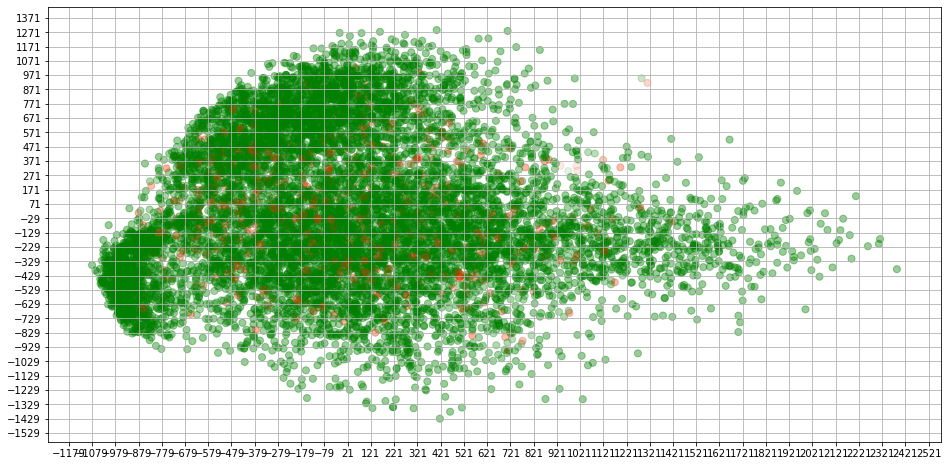

In [113]:
test["color"] = test["label"] == test["pred"]
c = []
k = 0
for i in test["color"]:
    if i:
        c.append([0,0.5,0,a[k]])
    else:
        c.append([0.9,0.2,0,a[k]])
    k = k +1

fig = plt.figure(figsize = (16,8))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.scatter(test['principal component 1']
               , test['principal component 2']
               , c = c
               , s = 50)

ax.grid()

# alpha as a function of density

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


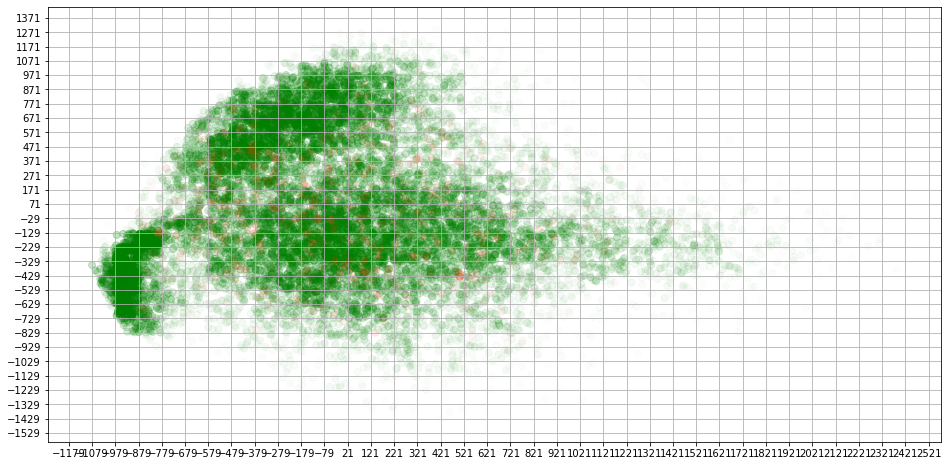

In [114]:
a = genAlpha(x_l_1,x_l_1,test,densityMap,"density")

test["color"] = test["label"] == test["pred"]
c = []
k = 0
for i in test["color"]:
    if i:
        c.append([0,0.5,0,a[k]])
    else:
        c.append([0.9,0.2,0,a[k]])
    k = k +1

fig = plt.figure(figsize = (16,8))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.scatter(test['principal component 1']
               , test['principal component 2']
               , c = c
               , s = 50)

ax.grid()

# alpha as a function of f1

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


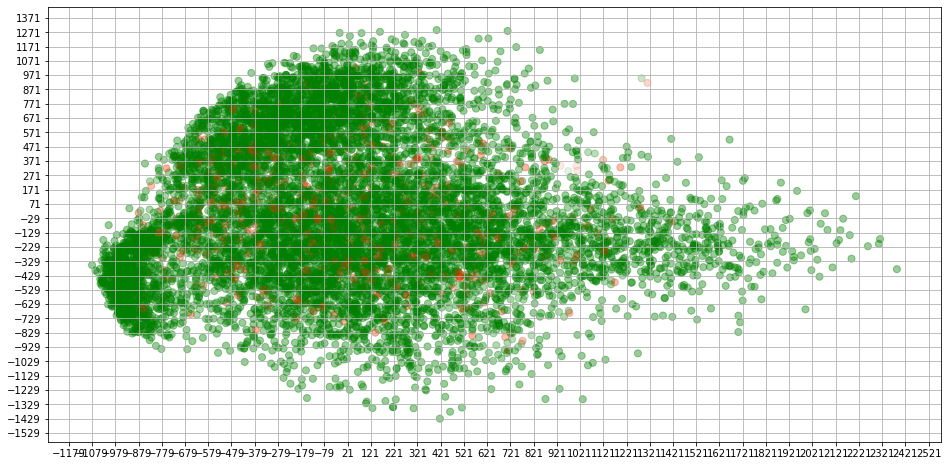

In [115]:
a = genAlpha(x_l_1,x_l_1,test,densityMap,"f1 score")

test["color"] = test["label"] == test["pred"]
c = []
k = 0
for i in test["color"]:
    if i:
        c.append([0,0.5,0,a[k]])
    else:
        c.append([0.9,0.2,0,a[k]])
    k = k +1

fig = plt.figure(figsize = (16,8))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.scatter(test['principal component 1']
               , test['principal component 2']
               , c = c
               , s = 50)

ax.grid()

# alpha as a function of recall

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


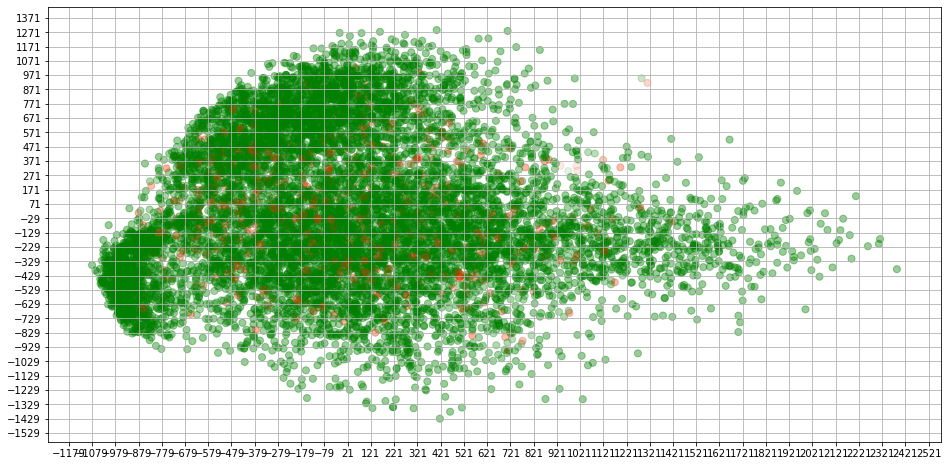

In [116]:
a = genAlpha(x_l_1,x_l_1,test,densityMap,"recall score")

test["color"] = test["label"] == test["pred"]
c = []
k = 0
for i in test["color"]:
    if i:
        c.append([0,0.5,0,a[k]])
    else:
        c.append([0.9,0.2,0,a[k]])
    k = k +1

fig = plt.figure(figsize = (16,8))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.scatter(test['principal component 1']
               , test['principal component 2']
               , c = c
               , s = 50)

ax.grid()

# alpha as a function of precision

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


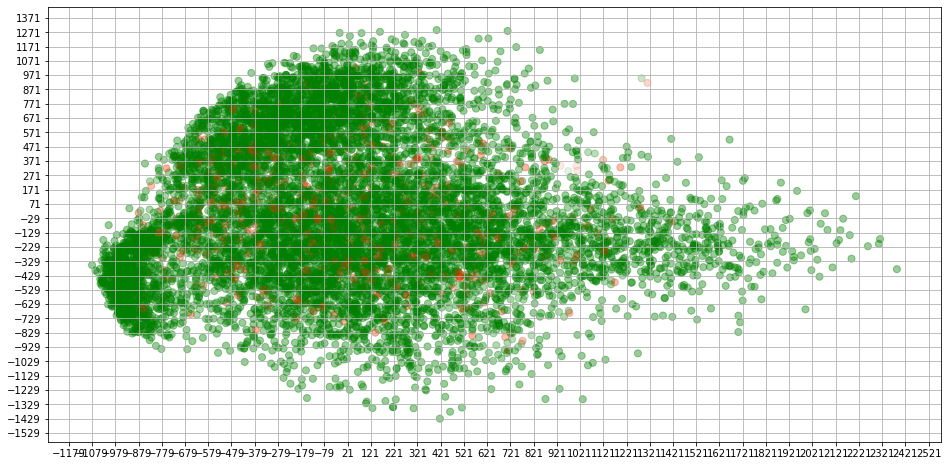

In [117]:
a = genAlpha(x_l_1,x_l_1,test,densityMap,"precision score")

test["color"] = test["label"] == test["pred"]
c = []
k = 0
for i in test["color"]:
    if i:
        c.append([0,0.5,0,a[k]])
    else:
        c.append([0.9,0.2,0,a[k]])
    k = k +1

fig = plt.figure(figsize = (16,8))
plt.xticks(x_l_1)
plt.yticks(y_l_1)
ax = fig.add_subplot(1,1,1) 
ax.scatter(test['principal component 1']
               , test['principal component 2']
               , c = c
               , s = 50)

ax.grid()